 # <h1><center><u> **Capstone Project 2024-25**</u></center></h1> #

###### <h1><center><u> Small Business Administration Loan Process</u> </center></h1> ######

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('SBAnational.csv')
data.head(5)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


### Breakdown of the columns and what they represent<br>
**LoanNr_ChkDgt**: Loan number with a check digit.<br>
<br>
**Name**: Name of the borrower.<br>
<br>
**City**: City where the borrower is located.<br>
<br>
**State**: State where the borrower is located.<br>
<br>
**Zip**: Zip code of the borrower's location.<br>
<br>
**Bank**: Bank that issued the loan.<br>
<br>
**BankState**: State where the bank is located.<br>
<br>
**NAICS**: North American Industry Classification System code for the borrower's industry.<br>
<br>
**ApprovalDate**: Date the loan was approved.<br>
<br>
**ApprovalFY**: Fiscal year the loan was approved.<br>
<br>
**Term**: Loan term in months.<br>
<br>
**NoEmp**: Number of employees.<br>
<br>
**NewExist**: Whether the business is new (1) or existing (2).<br>
<br>
**CreateJob**: Number of jobs created with the loan.<br>
<br>
**RetainedJob**: Number of jobs retained with the loan.<br>
<br>
**FranchiseCode**: Whether the business is a franchise (1) or not (0).<br>
<br>
**UrbanRural**: Whether the location is urban (1) or rural (0).<br>
<br>
**RevLineCr**: Whether the loan is a revolving line of credit (Y) or not (N).<br>
<br>
**LowDoc**: Whether the loan is a low documentation loan (Y) or not (N).<br>
<br>
**ChgOffDate**: Date the loan was charged off, if applicable.<br>
<br>
**DisbursementDate**: Date the loan was disbursed.<br>
<br>
**DisbursementGross**: Amount disbursed.<br>
<br>
**BalanceGross**: Remaining balance of the loan.<br>
<br>
**MIS_Status**: Loan status (P I F means Paid in Full).<br>
<br>
**ChgOffPrinGr**: Charge-off principal gross amount.<br>
<br>
**GrAppv**: Gross amount approved.<br>
<br>
**SBA_Appv**: SBA-approved amount.<br>
<br>

In [3]:
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-

In [4]:
missing_values_info = data.isnull().sum()
missing_values_info = missing_values_info[missing_values_info > 0]
missing_values_dict = missing_values_info.to_dict()
missing_values_dict

{'Name': 14,
 'City': 30,
 'State': 14,
 'Bank': 1559,
 'BankState': 1566,
 'NewExist': 136,
 'RevLineCr': 4528,
 'LowDoc': 2582,
 'ChgOffDate': 736465,
 'DisbursementDate': 2368,
 'MIS_Status': 1997}

In [5]:
columns_to_remove = ['GrAppv', 'SBA_Appv', 'ChgOffPrinGr', 'DisbursementGross', 'BalanceGross']

def clean_column(df, column_name):
    df[column_name] = df[column_name].str.replace('$', '').str.replace(',', '').astype(float)
    return df

def clean_columns(df, columns):
    for column in columns:
        df = clean_column(df, column)
    return df

data = clean_columns(data, columns_to_remove)

In [6]:
# Function to clean the 'ApprovalFY' column
def clean_year(year):
    if isinstance(year, str):  # Ensure the year is a string
        # Remove non-numeric characters
        cleaned_year = ''.join(filter(str.isdigit, year))
        return int(cleaned_year) if cleaned_year else None
    return year  # Return the year as is if it's already an integer

# Apply the cleaning function to the 'ApprovalFY' column
data['ApprovalFY'] = data['ApprovalFY'].apply(clean_year)

In [7]:
years = data['ApprovalFY'].unique()

sorted_years = np.sort(years)

print(sorted_years)

[1962 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014]


In [8]:
# Check consistency of date formats
date_columns = ['ApprovalDate','ChgOffDate', 'DisbursementDate']
for col in date_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col])

In [9]:
# Function to filter values that are not 'Y' or 'N'
def filter_yn(value):
    if value not in ['Y', 'N']:
        return np.nan
    return value

# Apply the function to the 'RevLineCr' and 'LowDoc' columns
data['RevLineCr'] = data['RevLineCr'].apply(filter_yn)
data['LowDoc'] = data['LowDoc'].apply(filter_yn)

In [10]:
def validate_naics(data, column='NAICS'):

    # Convert to string and check if it follows the 6-digit format
    is_valid_naics = data[column].astype(str).str.match(r'^\d{6}$')

    # Count valid and invalid NAICS codes
    valid_count = is_valid_naics.sum()
    invalid_count = (~is_valid_naics).sum()

    # Get sample of invalid NAICS values
    invalid_entries = data.loc[~is_valid_naics, [column]].head()

    return {
        "valid_count": valid_count,
        "invalid_count": invalid_count
    }

result = validate_naics(data)
result

{'valid_count': 697216, 'invalid_count': 201948}

In [11]:
missing_values_info = data.isnull().sum()
missing_values_info = missing_values_info[missing_values_info > 0]
missing_values_dict = missing_values_info.to_dict()
missing_values_dict

{'Name': 14,
 'City': 30,
 'State': 14,
 'Bank': 1559,
 'BankState': 1566,
 'NewExist': 136,
 'RevLineCr': 277479,
 'LowDoc': 6007,
 'ChgOffDate': 736465,
 'DisbursementDate': 2368,
 'MIS_Status': 1997}

In [12]:
def count_naics_53(data, column='NAICS'):
    return data[column].astype(str).str.startswith('53').sum()

total_naics_53 = count_naics_53(data)
print(f"Total rows with NAICS code starting with '53': {total_naics_53}")

Total rows with NAICS code starting with '53': 13632


In the U.S., historical recessions are defined by the National Bureau of Economic Research (NBER). Let us highlight the rows that were typical of the recessionary years. We'll have a new column!

In [13]:
recession_years = {1969, 1970, 1973, 1974, 1975, 1980, 1981, 1982, 1990, 1991, 
                   2001, 2007, 2008, 2009}

# Create a new column where 1 indicates a recession year, 0 otherwise
data['Recession'] = data['ApprovalFY'].apply(lambda x: 1 if x in recession_years else 0)

# Display the first few rows
data[['ApprovalFY', 'Recession']].head(10)

,ApprovalFY,Recession
0,1997,0
1,1997,0
2,1997,0
3,1997,0
4,1997,0
5,1997,0
6,1980,1
7,1997,0
8,1997,0
9,1997,0


In [14]:
# 2. 'Portion': Proportion of gross amount guaranteed by SBA
data['Portion'] = data['SBA_Appv'] / data['GrAppv']

# 3. 'RealEstate' variable
data['RealEstate'] = data['Term'].apply(lambda x: 1 if x >= 240 else 0)

In [15]:
# take random sample from whole data

data_sample = data.sample(frac=0.2,random_state=42)
data_sample.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Recession,Portion,RealEstate
614156,6106063001,"UNION GRAND RENTAL STA., INC.",WEST SENECA,NY,14224,MANUFACTURERS & TRADERS TR CO,NY,0,1993-12-10,1994,...,1994-04-30,225000.0,0.0,P I F,0.0,225000.0,191250.0,0,0.85,0
837937,8984934001,"POPE INDRUSTRIES, INC.",ATKINSON,NH,3811,"TD BANK, NATIONAL ASSOCIATION",DE,233320,2005-07-14,2005,...,2006-03-31,1000000.0,0.0,P I F,0.0,1000000.0,750000.0,0,0.75,0
766128,8048893003,HARKINS INVEST SOLUTIONS INC,DUNCANSVILLE,PA,16646,FIRST COMMONWEALTH BANK,PA,0,1995-02-03,1995,...,1995-04-30,30800.0,0.0,P I F,0.0,30800.0,25564.0,0,0.83,0
414468,4005365002,"HENRIKSEN CONTRACTING, LLC.",GRIMES,IA,50111,FEDERAL DEPOSIT INSUR CORP,IL,238990,2010-04-01,2010,...,2010-10-01,235000.0,0.0,P I F,0.0,235000.0,211500.0,0,0.90,0
214921,2518374005,J K TOOL & MACHINE INC,PHOENIX,AZ,85009,MERIDIAN BANK NATL ASSOC,AZ,444130,1998-11-24,1999,...,1999-01-31,50000.0,0.0,P I F,0.0,50000.0,37500.0,0,0.75,0


In [16]:
data_sample.shape

(179833, 30)

MIS_Status is our target variable

## Missing Values check

In [17]:
missing_values_info = data_sample.isnull().sum()
missing_values_info = missing_values_info[missing_values_info > 0]
missing_values_dict = missing_values_info.to_dict()
missing_values_dict

{'Name': 1,
 'City': 4,
 'State': 2,
 'Bank': 326,
 'BankState': 326,
 'NewExist': 28,
 'RevLineCr': 55422,
 'LowDoc': 1232,
 'ChgOffDate': 147420,
 'DisbursementDate': 501,
 'MIS_Status': 418}

### Remove unnecessary categorical columns

The columns 'LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', and 'FranchiseCode' can be considered for removal because they are not directly used as explanatory variables.

In [18]:
data_sample = data_sample.drop(columns=['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'FranchiseCode'])

In [19]:
data_sample = data_sample.drop(columns=['DisbursementDate', 'ChgOffDate', 'ApprovalDate', 'ApprovalFY'])

In [20]:
data_sample['LowDoc'].value_counts()

N    156303
Y     22298
Name: LowDoc, dtype: int64

In [21]:
data_sample['BalanceGross'].value_counts()

0.0         179830
827875.0         1
96908.0          1
1760.0           1
Name: BalanceGross, dtype: int64

We might as well remove BalanceGross from our classification criteria because it has a very high number of 0.0 values and offers no useful information.

In [22]:
data_sample = data_sample.drop(columns=['BalanceGross'])

There are a significant number of missing values in "RevLineCr": 55422. However, 'MIS_Status': 418, 'NewExist': 28, 'LowDoc': 1232 have few missing values, so we can substitute mode for them.

In [23]:
data_sample['RevLineCr'].value_counts()

N    83858
Y    40553
Name: RevLineCr, dtype: int64

In [24]:
data_sample['RevLineCr'].isna().sum()

55422

In [25]:
columns_to_check = ['NewExist', 'MIS_Status', 'LowDoc']

# Fill missing values with the mode (most frequent value) for each categorical column
for col in columns_to_check:
    data_sample[col] = data_sample[col].fillna(data_sample[col].mode()[0])

# Verify that there are no more NaN values in these columns
print(data_sample[columns_to_check].isnull().sum())

NewExist      0
MIS_Status    0
LowDoc        0
dtype: int64


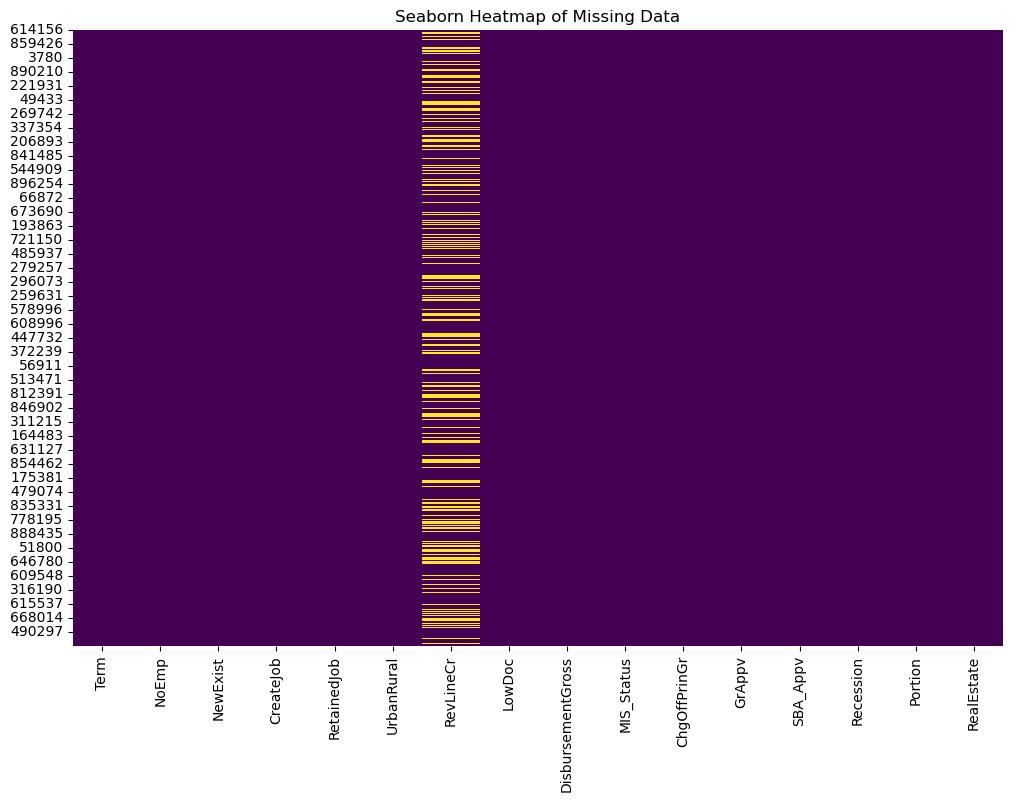

In [26]:
import missingno as msno
# Additionally, you can use a seaborn heatmap to visualize the boolean mask of missing data:
plt.figure(figsize=(12, 8))
sns.heatmap(data_sample.isnull(), cbar=False, cmap="viridis")
plt.title("Seaborn Heatmap of Missing Data")
plt.savefig("heatmap_missing_data.png")
plt.show()

In [ ]:
# 3. Missingness heatmap (shows correlations between missingness of different variables)
# plt.figure(figsize=(10, 8))
# msno.heatmap(data_sample)
# plt.title("Missing Data Correlation")
# plt.savefig("Correlation_heatmap_missing_data.png")
# plt.show()

### classification as categorical and numerical columns

Following a thorough analysis, the numerical and categorical columns have been separated into arrays.

In [27]:
categorical_features = ['RevLineCr', 'LowDoc', 'MIS_Status', 'UrbanRural', 'NewExist', 'RealEstate', 'Recession']

In [28]:
numerical_features = ['Term', 'GrAppv', 'SBA_Appv', 'ChgOffPrinGr', 'DisbursementGross', 'NoEmp', 'CreateJob', 'RetainedJob', 'Portion']

In [29]:
categorical_cols = data_sample[categorical_features]
categorical_cols.head(5)

,RevLineCr,LowDoc,MIS_Status,UrbanRural,NewExist,RealEstate,Recession
614156,N,N,P I F,0,2.0,0,0
837937,N,N,P I F,1,1.0,0,0
766128,N,Y,P I F,0,2.0,0,0
414468,N,N,P I F,2,1.0,0,0
214921,NaN,N,P I F,0,1.0,0,0


In [30]:
numerical_cols = data_sample[numerical_features]
numerical_cols.head(5)

,Term,GrAppv,SBA_Appv,ChgOffPrinGr,DisbursementGross,NoEmp,CreateJob,RetainedJob,Portion
614156,84,225000.0,191250.0,0.0,225000.0,2,0,0,0.85
837937,12,1000000.0,750000.0,0.0,1000000.0,3,0,0,0.75
766128,60,30800.0,25564.0,0.0,30800.0,3,0,0,0.83
414468,120,235000.0,211500.0,0.0,235000.0,15,16,15,0.90
214921,60,50000.0,37500.0,0.0,50000.0,3,0,0,0.75


### summary of statistical measures

In [31]:
numerical_cols.describe()

,Term,GrAppv,SBA_Appv,ChgOffPrinGr,DisbursementGross,NoEmp,CreateJob,RetainedJob,Portion
count,179833.000000,1.798330e+05,1.798330e+05,1.798330e+05,1.798330e+05,179833.000000,179833.000000,179833.000000,179833.000000
mean,110.932638,1.926191e+05,1.493853e+05,1.347981e+04,2.010328e+05,11.313146,8.350119,10.575161,0.709418
std,78.943267,2.827081e+05,2.272185e+05,6.435734e+04,2.872101e+05,70.449622,234.456715,234.383606,0.173851
min,0.000000,4.000000e+02,2.000000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.080000
25%,60.000000,3.500000e+04,2.125000e+04,0.000000e+00,4.200000e+04,2.000000,0.000000,0.000000,0.500000
50%,84.000000,9.000000e+04,6.160000e+04,0.000000e+00,1.000000e+05,4.000000,0.000000,1.000000,0.750000
75%,120.000000,2.256000e+05,1.750000e+05,0.000000e+00,2.380000e+05,10.000000,1.000000,4.000000,0.850000
max,511.000000,5.000000e+06,4.500000e+06,1.999999e+06,1.100000e+07,9000.000000,8800.000000,8800.000000,1.000000


For variables Term, GrAppv, SBA_Appv, DisbursementGross, the mean is significantly higher than the median. This is a typical signal of right-skewed distributions where a few very high values pull the mean upward.

Some variables (notably ChgOffPrinGr, CreateJob, and RetainedJob) have medians at or near zero, indicating that a large proportion of observations are zero—this suggests a zero-inflated pattern where most cases show no change or no job creation/retention, but a few cases have very high values.

The standard deviations are large relative to the medians for several variables (e.g., CreateJob and RetainedJob have standard deviations over 230 despite medians of 0 and 1, respectively), reflecting high variability and the potential influence of outliers.

The Portion variable is bounded between 0.08 and 1, with a median of 0.75. Its relatively narrow range and lower variability (standard deviation ~0.17) indicate that it is less skewed compared to the other variables.

# Exploratory Data Analysis

RevLineCr:
 N    83858
Y    40553
Name: RevLineCr, dtype: int64


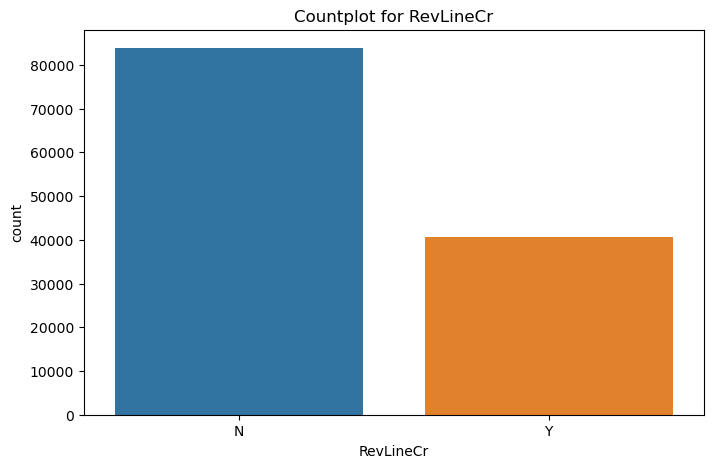

LowDoc:
 N    157535
Y     22298
Name: LowDoc, dtype: int64


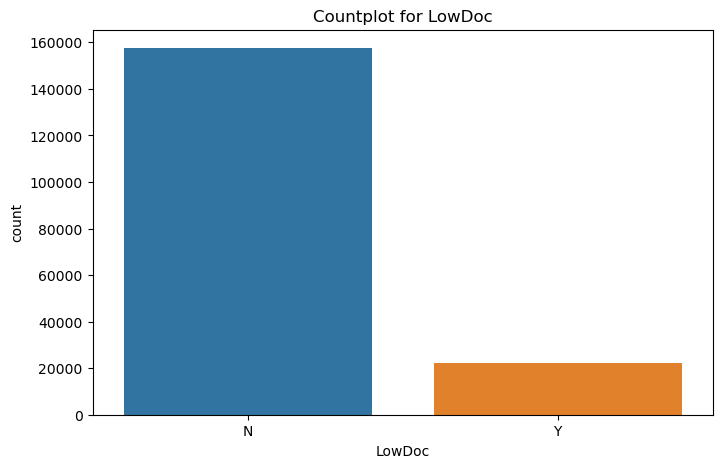

MIS_Status:
 P I F     148458
CHGOFF     31375
Name: MIS_Status, dtype: int64


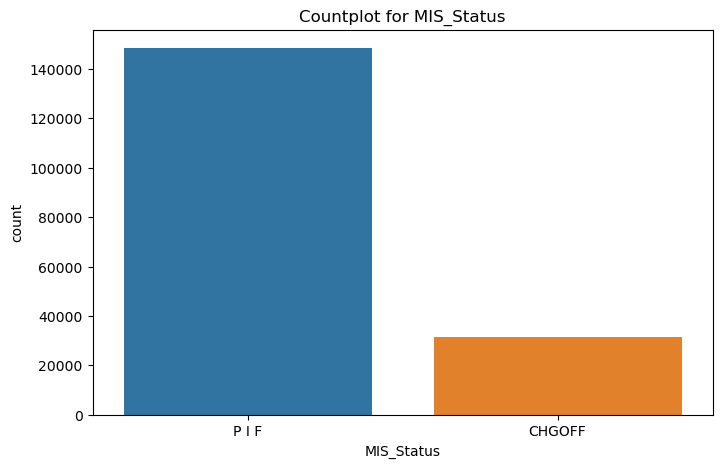

UrbanRural:
 1    94002
0    64768
2    21063
Name: UrbanRural, dtype: int64


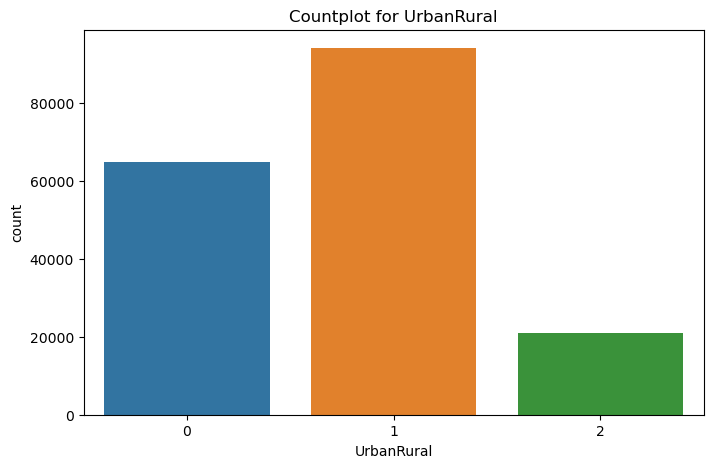

NewExist:
 1.0    128993
2.0     50619
0.0       221
Name: NewExist, dtype: int64


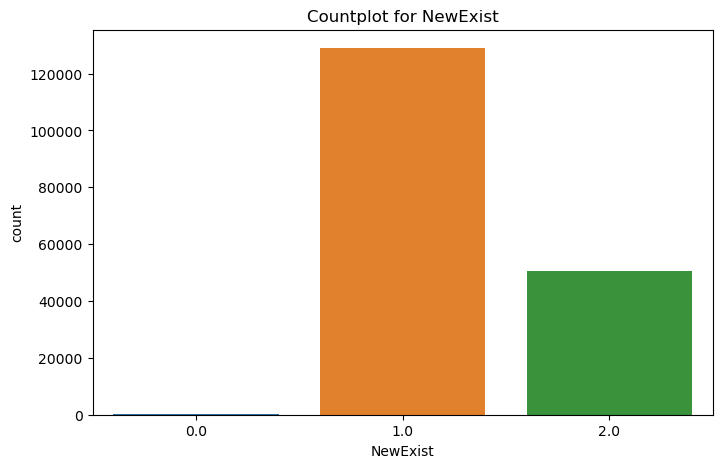

RealEstate:
 0    149270
1     30563
Name: RealEstate, dtype: int64


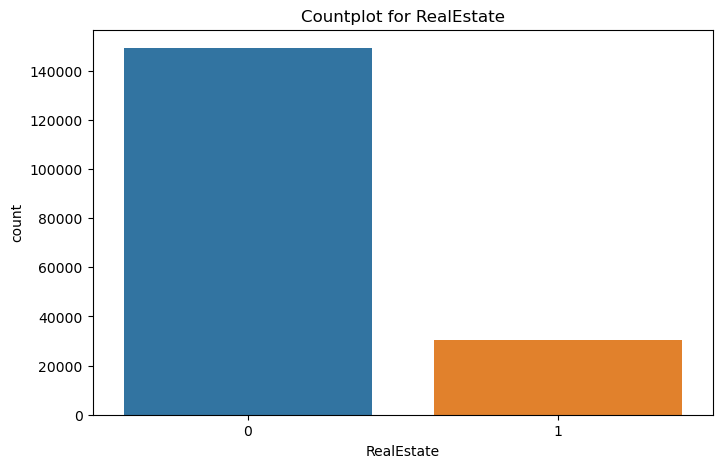

Recession:
 0    139866
1     39967
Name: Recession, dtype: int64


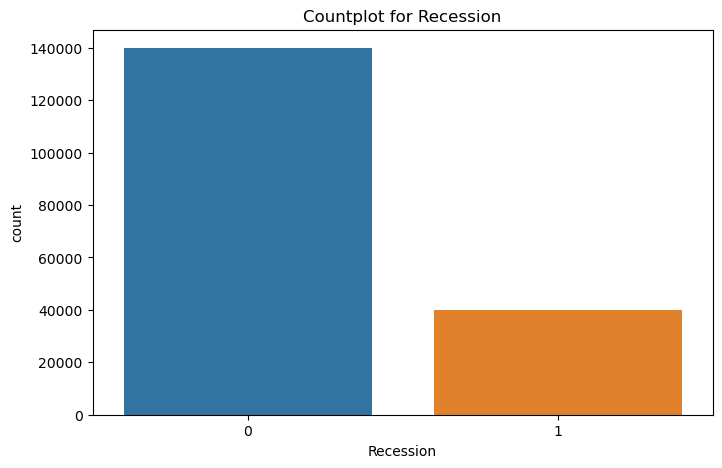

In [32]:
# Categorical EDA
for feature in categorical_features:
    print(f"{feature}:\n", data_sample[feature].value_counts())

    plt.figure(figsize=(8, 5))  # Set figure size
    sns.countplot(x=feature, data=data_sample)
    plt.title(f"Countplot for {feature}")

    #Save plot as an image
    plt.savefig(f"{feature}_countplot.png", dpi=300, bbox_inches='tight')

    plt.show()  
    plt.close()

RevLineCr, MIS_Status, RealEstate, and Recession currently display binary values, while the remaining categorical features have three possible outcomes.)21

Since there are a lot of missing values in RevLineCr, we should consider those missing values to be in the third category. 

In [33]:
data_sample['RevLineCr'].unique()

array(['N', nan, 'Y'], dtype=object)

In [34]:
data_sample['RevLineCr'].fillna('U', inplace=True)

In [35]:
data_sample['RevLineCr'].isna().sum()

0

Let us change NewExist to New and swap out 0.0 for the values of the mode.

In [36]:
mode_value = data_sample['NewExist'].mode()[0]
data_sample['NewExist'] = data_sample['NewExist'].replace(0.0, mode_value)

data_sample.rename(columns={'NewExist': 'New'}, inplace=True)

## Boxplots for Outliers

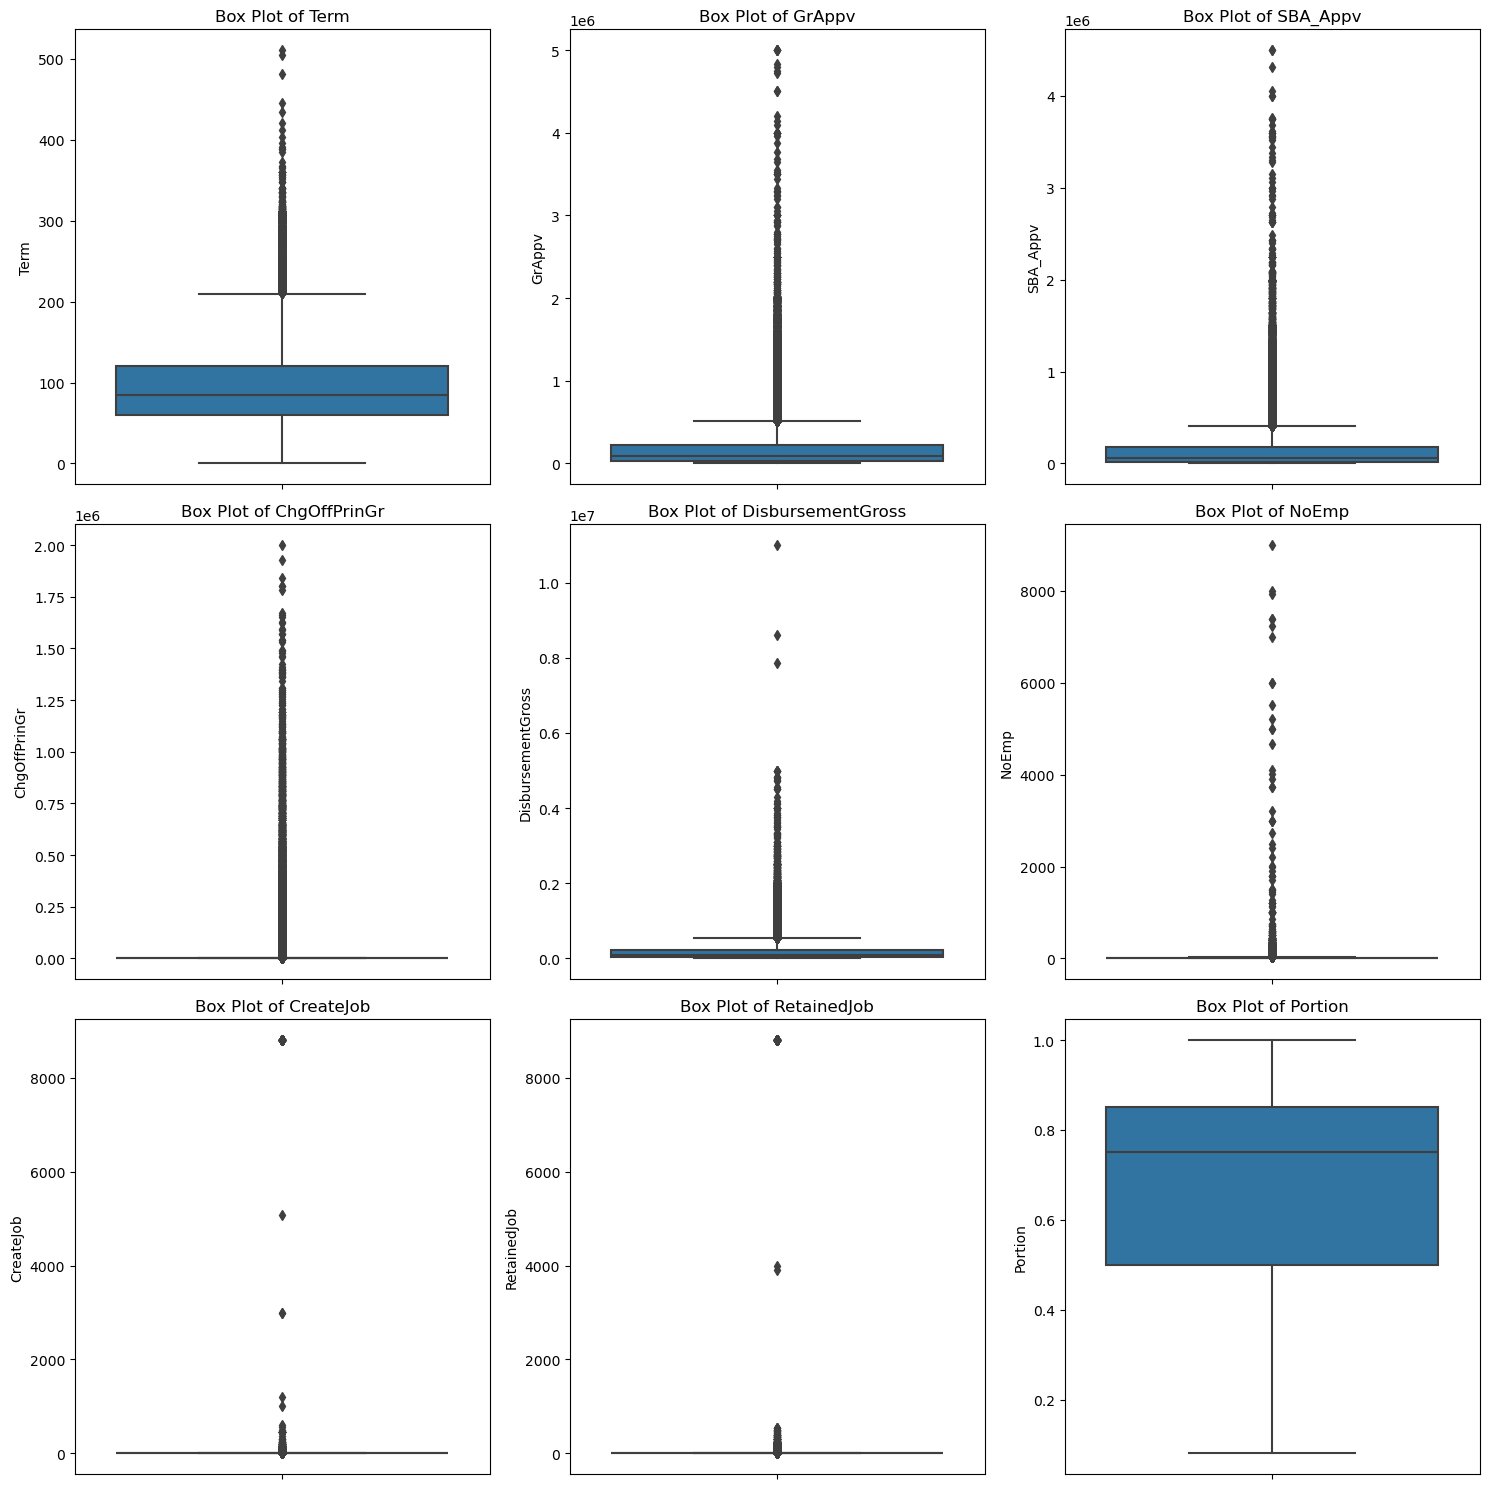

In [37]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# Loop through each numerical feature
for i, feature in enumerate(numerical_features):
    if i < 9:  # Plot only the first 9 features
        sns.boxplot(y=data_sample[feature], ax=axes[i])
        axes[i].set_title(f'Box Plot of {feature}')
        axes[i].set_ylabel(feature)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

#Save the entire figure as an image
plt.savefig(f"boxplots_grid.png", dpi=300, bbox_inches='tight')

plt.show()

## Histograms for Skewness

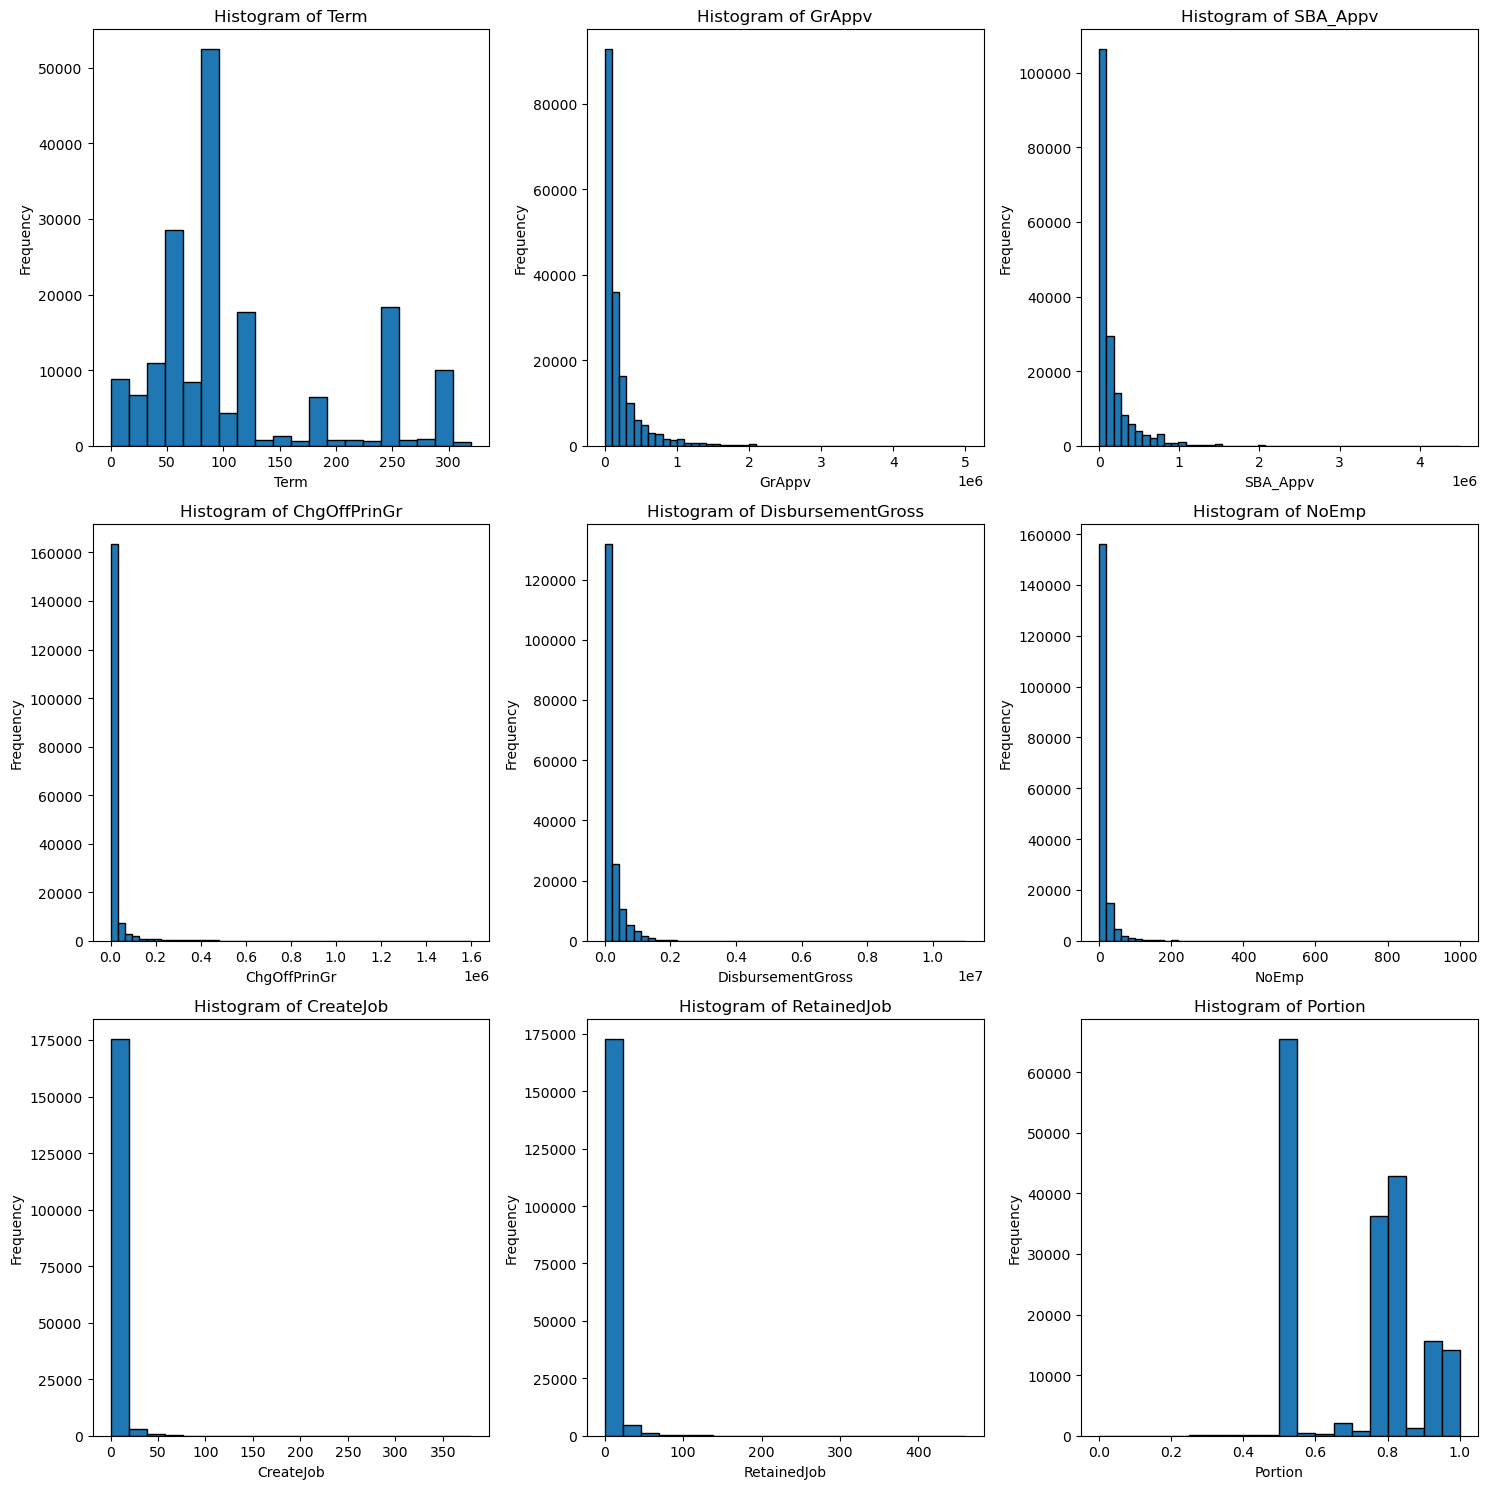

In [38]:
# Custom bin sizes and ranges for each feature
bin_ranges = {
    'Term': (0, 320, 20),
    'GrAppv': (0, 5000000, 50),
    'SBA_Appv': (0, 4500000, 50),
    'ChgOffPrinGr': (0, 1600000, 50),
    'DisbursementGross': (0, 11000000, 50),
    'BalanceGross': (0, 85000, 50),
    'NoEmp': (0, 1000, 50),
    'CreateJob': (0, 380, 20),
    'RetainedJob': (0, 460, 20),
    'Portion': (0, 1, 20)
}

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    if i < 9:  # Only plot the first 9 features in the 3x3 grid
        axes[i].hist(data_sample[feature], bins=bin_ranges[feature][2], range=bin_ranges[feature][:2], edgecolor='black')
        axes[i].set_title(f'Histogram of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig(f"histograms_grid.png", dpi=300, bbox_inches='tight')
plt.show()

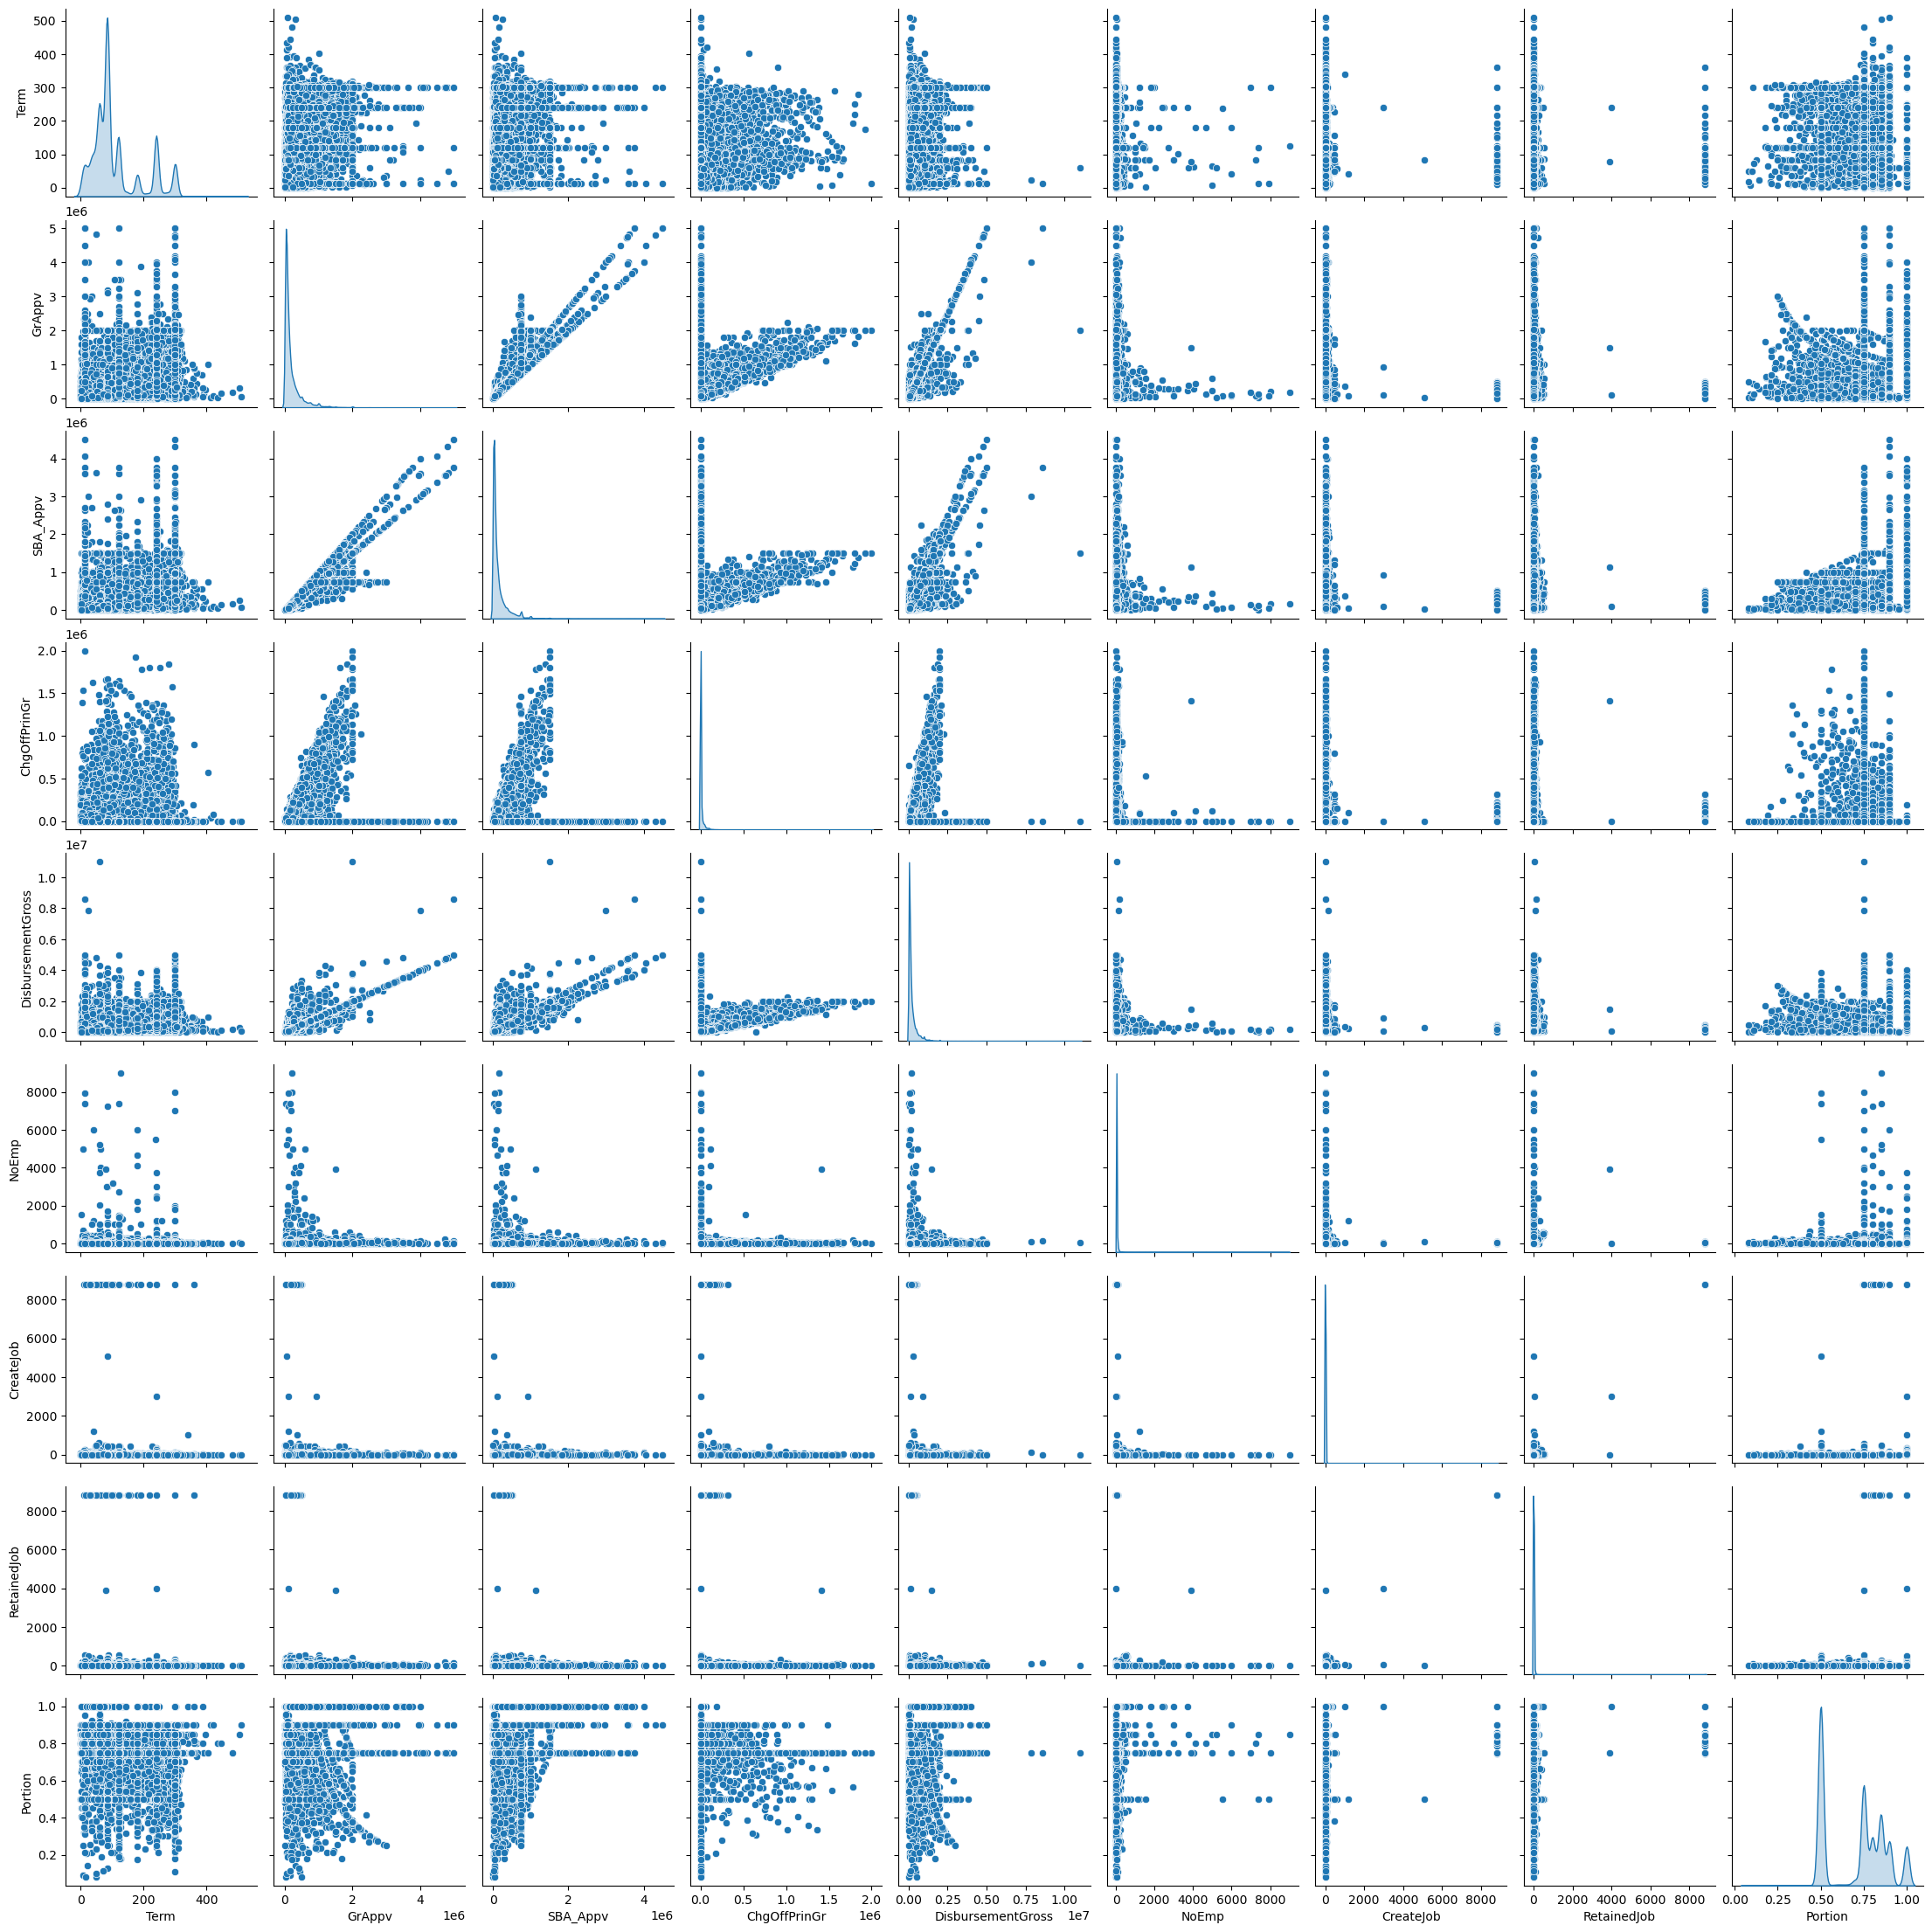

In [39]:
sns.pairplot(data=numerical_cols, diag_kind='kde')
plt.savefig(f"pairplot.png", dpi=300, bbox_inches='tight')
plt.show()

### Pearson Correlation

In [40]:
correlation_matrix = data_sample[numerical_features].corr()
correlation_matrix

,Term,GrAppv,SBA_Appv,ChgOffPrinGr,DisbursementGross,NoEmp,CreateJob,RetainedJob,Portion
Term,1.000000,0.505264,0.528717,-0.048198,0.469265,0.047273,0.026905,0.023948,0.435666
GrAppv,0.505264,1.000000,0.974251,0.190728,0.972393,0.091632,0.007658,0.009786,0.259168
SBA_Appv,0.528717,0.974251,1.000000,0.163981,0.941181,0.093919,0.013184,0.013742,0.356406
ChgOffPrinGr,-0.048198,0.190728,0.163981,1.000000,0.188607,0.012698,0.007950,0.010917,-0.015504
DisbursementGross,0.469265,0.972393,0.941181,0.188607,1.000000,0.089976,0.006286,0.009141,0.209878
NoEmp,0.047273,0.091632,0.093919,0.012698,0.089976,1.000000,0.007078,0.017620,0.049289
CreateJob,0.026905,0.007658,0.013184,0.007950,0.006286,0.007078,1.000000,0.995521,0.040483
RetainedJob,0.023948,0.009786,0.013742,0.010917,0.009141,0.017620,0.995521,1.000000,0.033484
Portion,0.435666,0.259168,0.356406,-0.015504,0.209878,0.049289,0.040483,0.033484,1.000000


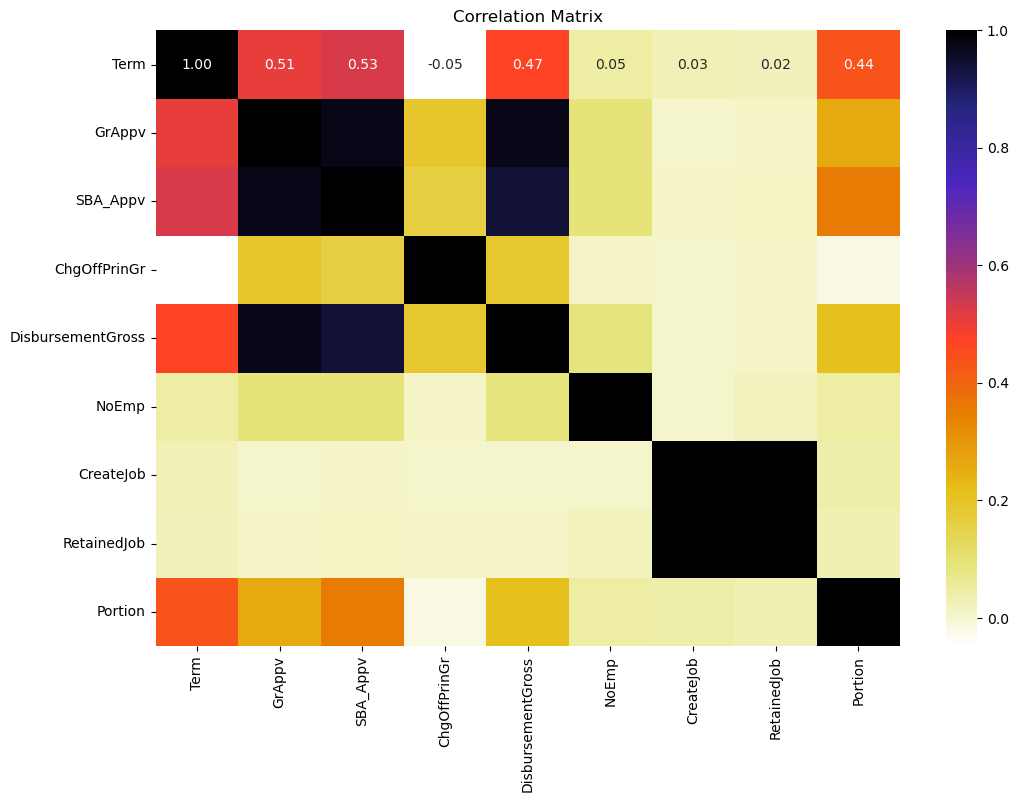

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.CMRmap_r, fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig(f"correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

### Identifying highly correlated features

In [42]:
def separate_highly_correlated_features(df, threshold=0.8):
    
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()

    # Mask the diagonal to avoid self-correlation
    corr_matrix.values[range(len(corr_matrix)), range(len(corr_matrix))] = 0

    # Find feature pairs with correlation greater than the threshold
    highly_correlated_features = [
        (col1, col2) 
        for col1 in corr_matrix.columns 
        for col2 in corr_matrix.index 
        if corr_matrix.loc[col1, col2] > threshold
    ]

    # Identify features not involved in any high correlation pairs
    all_correlated_features = set([feature for pair in highly_correlated_features for feature in pair])
    uncorrelated_features = [feature for feature in df.columns if feature not in all_correlated_features]

    return highly_correlated_features, uncorrelated_features

features = separate_highly_correlated_features(data_sample[numerical_features])
features

([('GrAppv', 'SBA_Appv'),
  ('GrAppv', 'DisbursementGross'),
  ('SBA_Appv', 'GrAppv'),
  ('SBA_Appv', 'DisbursementGross'),
  ('DisbursementGross', 'GrAppv'),
  ('DisbursementGross', 'SBA_Appv'),
  ('CreateJob', 'RetainedJob'),
  ('RetainedJob', 'CreateJob')],
 ['Term', 'ChgOffPrinGr', 'NoEmp', 'Portion'])

In [43]:
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [44]:
data_sample = data_sample.drop(columns=to_drop)

In [45]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179833 entries, 614156 to 15414
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Term          179833 non-null  int64  
 1   NoEmp         179833 non-null  int64  
 2   New           179833 non-null  float64
 3   CreateJob     179833 non-null  int64  
 4   UrbanRural    179833 non-null  int64  
 5   RevLineCr     179833 non-null  object 
 6   LowDoc        179833 non-null  object 
 7   MIS_Status    179833 non-null  object 
 8   ChgOffPrinGr  179833 non-null  float64
 9   GrAppv        179833 non-null  float64
 10  Recession     179833 non-null  int64  
 11  Portion       179833 non-null  float64
 12  RealEstate    179833 non-null  int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 19.2+ MB


In [46]:
# Log transform highly skewed features
log_transformed_features = ['GrAppv', 'ChgOffPrinGr']
for feature in log_transformed_features:
    data_sample[f'{feature}_log'] = np.log1p(data_sample[feature])

# Square root transform moderately skewed features
sqrt_transformed_features = ['NoEmp', 'CreateJob']
for feature in sqrt_transformed_features:
    data_sample[f'{feature}_sqrt'] = np.sqrt(data_sample[feature])

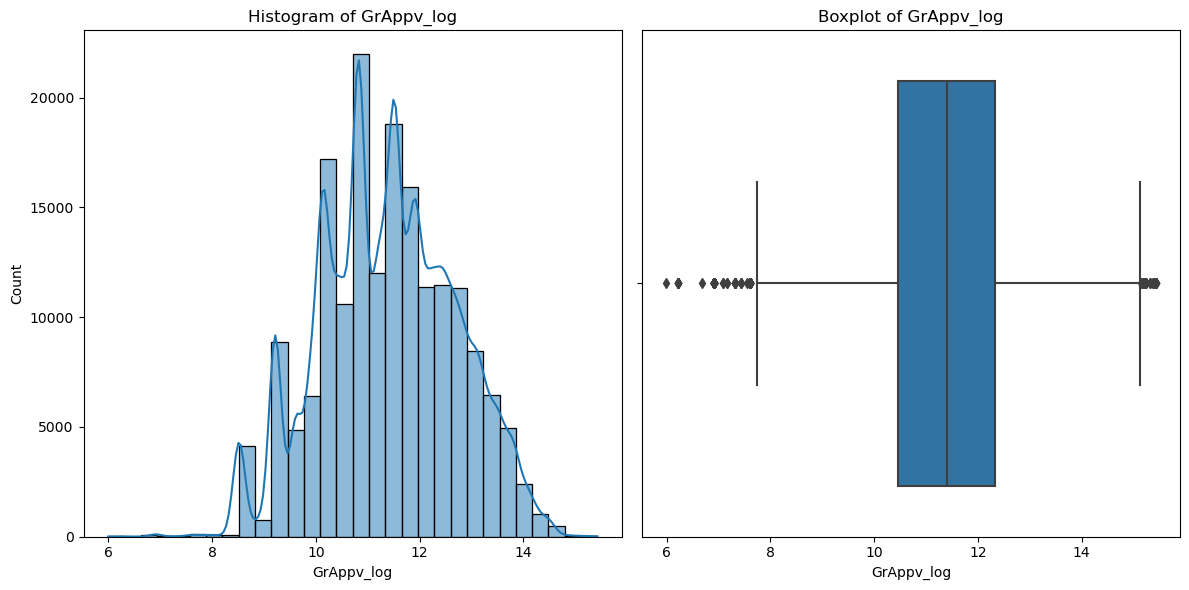

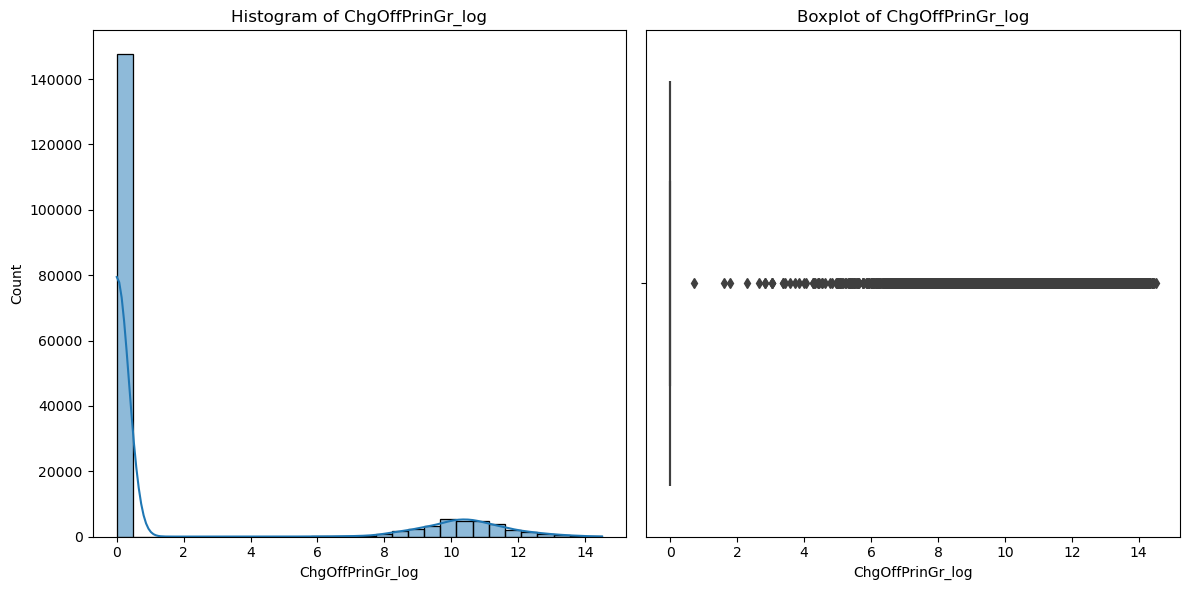

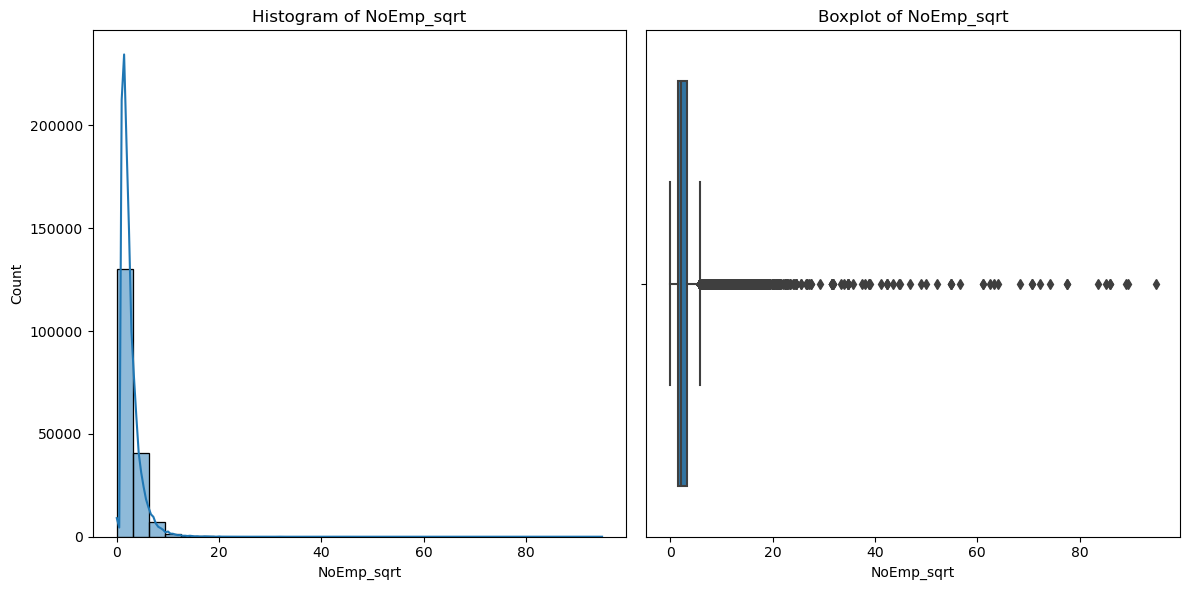

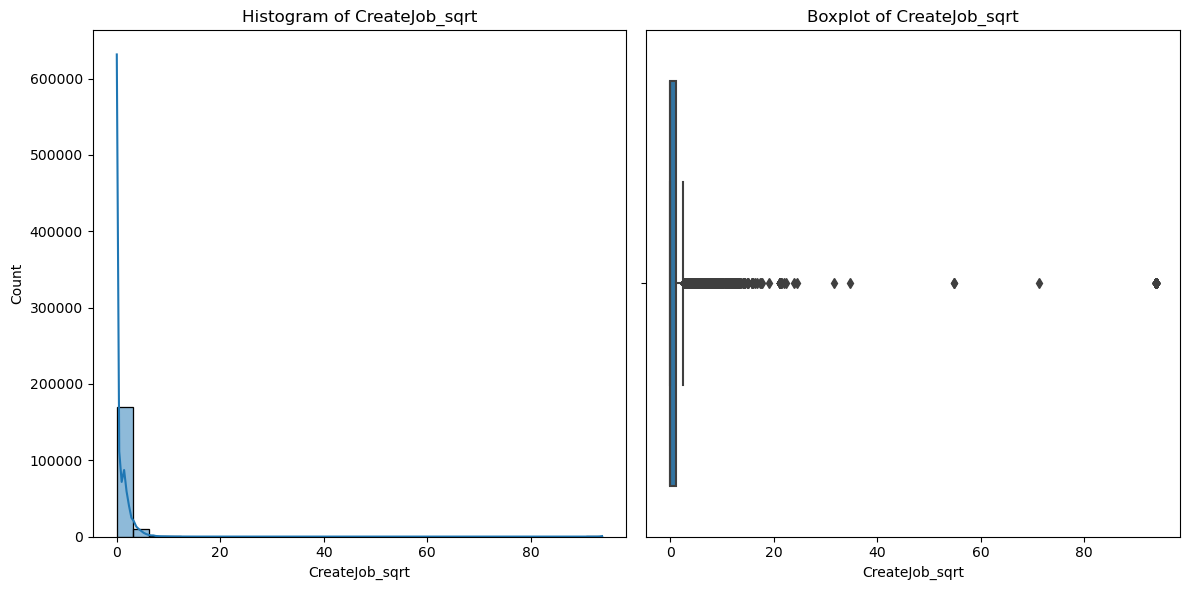

In [47]:
transformed_features = [f'{feature}_log' for feature in log_transformed_features] + \
                       [f'{feature}_sqrt' for feature in sqrt_transformed_features]

for feature in transformed_features:
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data_sample[feature], kde=True, bins=30)
    plt.title(f"Histogram of {feature}")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data_sample[feature])
    plt.title(f"Boxplot of {feature}")

    # Adjust layout to avoid overlapping
    plt.tight_layout()

    plt.savefig(f"{feature}_plots.png", dpi=300, bbox_inches='tight')
    plt.show()

In [48]:
data_sample = data_sample.drop(columns=['GrAppv', 'ChgOffPrinGr', 'NoEmp', 'CreateJob'])

In [50]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179833 entries, 614156 to 15414
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Term              179833 non-null  int64  
 1   New               179833 non-null  float64
 2   UrbanRural        179833 non-null  int64  
 3   RevLineCr         179833 non-null  object 
 4   LowDoc            179833 non-null  object 
 5   MIS_Status        179833 non-null  object 
 6   Recession         179833 non-null  int64  
 7   Portion           179833 non-null  float64
 8   RealEstate        179833 non-null  int64  
 9   GrAppv_log        179833 non-null  float64
 10  ChgOffPrinGr_log  179833 non-null  float64
 11  NoEmp_sqrt        179833 non-null  float64
 12  CreateJob_sqrt    179833 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 19.2+ MB


In [51]:
numerical_features = ['Term', 'GrAppv_log', 'ChgOffPrinGr_log', 'NoEmp_sqrt', 'CreateJob_sqrt', 'Portion']
categorical_features = ['RevLineCr', 'MIS_Status', 'UrbanRural', 'New', 'RealEstate', 'Recession', 'LowDoc']

## one-way ANOVA

In [52]:
from scipy.stats import f_oneway
# Function to perform ANOVA for each numerical feature vs each categorical feature
def perform_anova(df, numerical_features, categorical_features):
    results = {}
    
    for cat_feature in categorical_features:
        for num_feature in numerical_features:
            # Create groups for the ANOVA
            groups = [df[df[cat_feature] == category][num_feature].dropna() for category in df[cat_feature].unique()]
            
            # Perform one-way ANOVA
            f_stat, p_val = f_oneway(*groups)
            
            # Store the results
            results[f"{num_feature} ~ {cat_feature}"] = {'F-Statistic': f_stat, 'p-value': p_val}
    
    return pd.DataFrame(results).T

# Perform ANOVA on each combination of numerical and categorical feature
anova_results = perform_anova(data_sample, numerical_features, categorical_features)

# Filter for significant results (p-value < 0.05)
significant_results = anova_results[anova_results['p-value'] < 0.05]

# Display results
# print(anova_results)
print("\nSignificant results (p-value < 0.05):")
print(significant_results)


Significant results (p-value < 0.05):
                                F-Statistic        p-value
Term ~ RevLineCr               1.158160e+04   0.000000e+00
GrAppv_log ~ RevLineCr         1.661160e+04   0.000000e+00
ChgOffPrinGr_log ~ RevLineCr   1.003304e+03   0.000000e+00
NoEmp_sqrt ~ RevLineCr         2.175438e+03   0.000000e+00
CreateJob_sqrt ~ RevLineCr     7.185428e+01   6.405377e-32
Portion ~ RevLineCr            5.937774e+04   0.000000e+00
Term ~ MIS_Status              1.936736e+04   0.000000e+00
GrAppv_log ~ MIS_Status        5.899630e+03   0.000000e+00
ChgOffPrinGr_log ~ MIS_Status  3.297070e+06   0.000000e+00
NoEmp_sqrt ~ MIS_Status        1.875569e+03   0.000000e+00
CreateJob_sqrt ~ MIS_Status    3.075249e+01   2.935371e-08
Portion ~ MIS_Status           5.614127e+03   0.000000e+00
Term ~ UrbanRural              5.572439e+03   0.000000e+00
GrAppv_log ~ UrbanRural        4.633226e+03   0.000000e+00
ChgOffPrinGr_log ~ UrbanRural  4.104074e+03   0.000000e+00
NoEmp_sqrt ~ Urba

### One Hot encoding

In [53]:
data_sample = pd.get_dummies(data_sample, columns=categorical_features, drop_first=True)
# data_sample[categorical_features] = data_sample[categorical_features].astype(int)

In [54]:
data_sample.head(5)

,Term,Portion,GrAppv_log,ChgOffPrinGr_log,NoEmp_sqrt,CreateJob_sqrt,RevLineCr_U,RevLineCr_Y,MIS_Status_P I F,UrbanRural_1,UrbanRural_2,New_2.0,RealEstate_1,Recession_1,LowDoc_Y
614156,84,0.85,12.323860,0.0,1.414214,0.0,0,0,1,0,0,1,0,0,0
837937,12,0.75,13.815512,0.0,1.732051,0.0,0,0,1,1,0,0,0,0,0
766128,60,0.83,10.335302,0.0,1.732051,0.0,0,0,1,0,0,1,0,0,1
414468,120,0.90,12.367345,0.0,3.872983,4.0,0,0,1,0,1,0,0,0,0
214921,60,0.75,10.819798,0.0,1.732051,0.0,1,0,1,0,0,0,0,0,0


In [55]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179833 entries, 614156 to 15414
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Term              179833 non-null  int64  
 1   Portion           179833 non-null  float64
 2   GrAppv_log        179833 non-null  float64
 3   ChgOffPrinGr_log  179833 non-null  float64
 4   NoEmp_sqrt        179833 non-null  float64
 5   CreateJob_sqrt    179833 non-null  float64
 6   RevLineCr_U       179833 non-null  uint8  
 7   RevLineCr_Y       179833 non-null  uint8  
 8   MIS_Status_P I F  179833 non-null  uint8  
 9   UrbanRural_1      179833 non-null  uint8  
 10  UrbanRural_2      179833 non-null  uint8  
 11  New_2.0           179833 non-null  uint8  
 12  RealEstate_1      179833 non-null  uint8  
 13  Recession_1       179833 non-null  uint8  
 14  LowDoc_Y          179833 non-null  uint8  
dtypes: float64(5), int64(1), uint8(9)
memory usage: 11.1 MB


In [56]:
new_column_names = {
    'MIS_Status_P I F': 'MIS_Status',
    'New_2.0': 'New',
    'RealEstate_1': 'RealEstate',
    'Recession_1': 'Recession',
    'LowDoc_Y': 'LowDoc'
}

# Rename the columns
data_sample.rename(columns=new_column_names, inplace=True)

In [57]:
data_sample.isna().sum()

Term                0
Portion             0
GrAppv_log          0
ChgOffPrinGr_log    0
NoEmp_sqrt          0
CreateJob_sqrt      0
RevLineCr_U         0
RevLineCr_Y         0
MIS_Status          0
UrbanRural_1        0
UrbanRural_2        0
New                 0
RealEstate          0
Recession           0
LowDoc              0
dtype: int64

# Model

## splitting data into train and test

In [58]:
X = data_sample.drop(columns=['MIS_Status'])  
y = data_sample['MIS_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [59]:
X

,Term,Portion,GrAppv_log,ChgOffPrinGr_log,NoEmp_sqrt,CreateJob_sqrt,RevLineCr_U,RevLineCr_Y,UrbanRural_1,UrbanRural_2,New,RealEstate,Recession,LowDoc
614156,84,0.85,12.323860,0.000000,1.414214,0.000000,0,0,0,0,1,0,0,0
837937,12,0.75,13.815512,0.000000,1.732051,0.000000,0,0,1,0,0,0,0,0
766128,60,0.83,10.335302,0.000000,1.732051,0.000000,0,0,0,0,1,0,0,1
414468,120,0.90,12.367345,0.000000,3.872983,4.000000,0,0,0,1,0,0,0,0
214921,60,0.75,10.819798,0.000000,1.732051,0.000000,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180995,56,0.50,10.463132,10.463132,2.000000,0.000000,0,1,1,0,0,0,1,0
214868,36,0.80,11.512935,0.000000,2.000000,0.000000,1,0,0,0,0,0,0,0
348689,120,0.85,13.527830,0.000000,18.841444,0.000000,0,0,0,0,1,0,0,0
836600,70,0.85,11.894788,11.741240,1.000000,3.872983,1,0,1,0,0,0,0,0


### Feature Selection

In [60]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N features and their importance values
N = 10
top_features = feature_importance_df.head(N)
print(top_features)

             Feature  Importance
3   ChgOffPrinGr_log    0.741784
0               Term    0.172777
2         GrAppv_log    0.020026
1            Portion    0.011294
8       UrbanRural_1    0.011216
4         NoEmp_sqrt    0.009592
11        RealEstate    0.008781
12         Recession    0.008063
5     CreateJob_sqrt    0.005517
7        RevLineCr_Y    0.002866


With an importance of ~0.74, this single feature dwarfs all others combined. It suggests that ChgOffPrinGr_log (the log-transformed charged-off principal) is highly predictive of our classification target.

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.9940779047460172


In [62]:
from sklearn.metrics import classification_report, roc_auc_score

# Print classification report
print(classification_report(y_test, y_pred))

# Get predicted probabilities for AUC
y_prob = logreg.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", auc)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      6275
           1       1.00      0.99      1.00     29692

    accuracy                           0.99     35967
   macro avg       0.99      0.99      0.99     35967
weighted avg       0.99      0.99      0.99     35967

ROC-AUC Score: 0.99790352801377


### Confusion Matrix

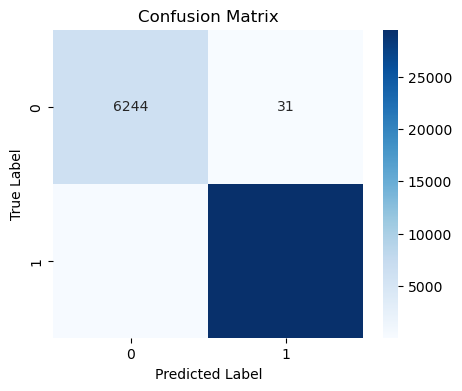

In [63]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [64]:
cm

array([[ 6244,    31],
       [  182, 29510]], dtype=int64)

In [65]:
# Get feature coefficients
coefs = np.abs(logreg.coef_[0])

# Create DataFrame
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefs})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Display important features
print(feature_importance)

             Feature  Coefficient
3   ChgOffPrinGr_log     1.020246
1            Portion     0.805628
11        RealEstate     0.544207
8       UrbanRural_1     0.412314
9       UrbanRural_2     0.308190
13            LowDoc     0.280879
12         Recession     0.220863
7        RevLineCr_Y     0.179371
10               New     0.057992
2         GrAppv_log     0.054211
5     CreateJob_sqrt     0.018734
6        RevLineCr_U     0.016420
4         NoEmp_sqrt     0.005498
0               Term     0.001848


In [66]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define stratified k-fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate Logistic Regression with cross-validation
cv_scores = cross_val_score(logreg, X_train, y_train, cv=skf, scoring='roc_auc')

print("Cross-Validation ROC-AUC Scores:", cv_scores)
print("Mean ROC-AUC:", np.mean(cv_scores))

Cross-Validation ROC-AUC Scores: [0.99711266 0.99711551 0.99736754 0.99769924 0.99737965]
Mean ROC-AUC: 0.9973349199831718


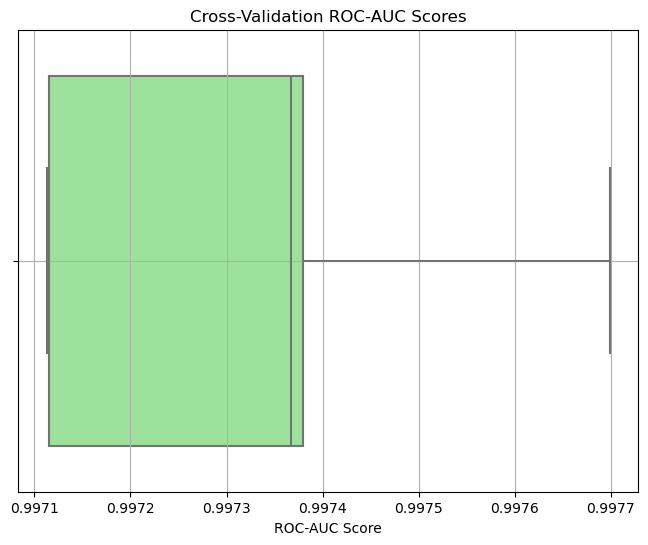

In [103]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=cv_scores, color='lightgreen')
plt.title('Cross-Validation ROC-AUC Scores')
plt.xlabel('ROC-AUC Score')
plt.grid(True)
plt.show()

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Standardize the data (recommended for consistency)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)  
X_scaled_df = pd.DataFrame(X_scaled, columns=X_train.columns)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))

             Feature       VIF
0               Term  5.304901
11        RealEstate  4.421269
1            Portion  2.238462
7        RevLineCr_Y  2.100107
2         GrAppv_log  1.858970
8       UrbanRural_1  1.840044
6        RevLineCr_U  1.376359
9       UrbanRural_2  1.350790
13            LowDoc  1.317888
4         NoEmp_sqrt  1.246175
3   ChgOffPrinGr_log  1.190021
12         Recession  1.092639
10               New  1.085388
5     CreateJob_sqrt  1.052422


The largest VIF is about 5.30 (Term), which is borderline but still not extremely high. RealEstate is at 4.42, which is moderately high but still within an acceptable range for many analyses.
All other features have VIFs below 3, which generally indicates low collinearity.

## Catboost Classifier

In [72]:
from catboost import CatBoostClassifier
# Train the CatBoost classifier
catboost_classifier = CatBoostClassifier(verbose=0)
catboost_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = catboost_classifier.predict(X_test)
y_proba = catboost_classifier.predict_proba(X_test)[:, 1]

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      6275
           1       1.00      0.99      1.00     29692

    accuracy                           0.99     35967
   macro avg       0.99      1.00      0.99     35967
weighted avg       0.99      0.99      0.99     35967



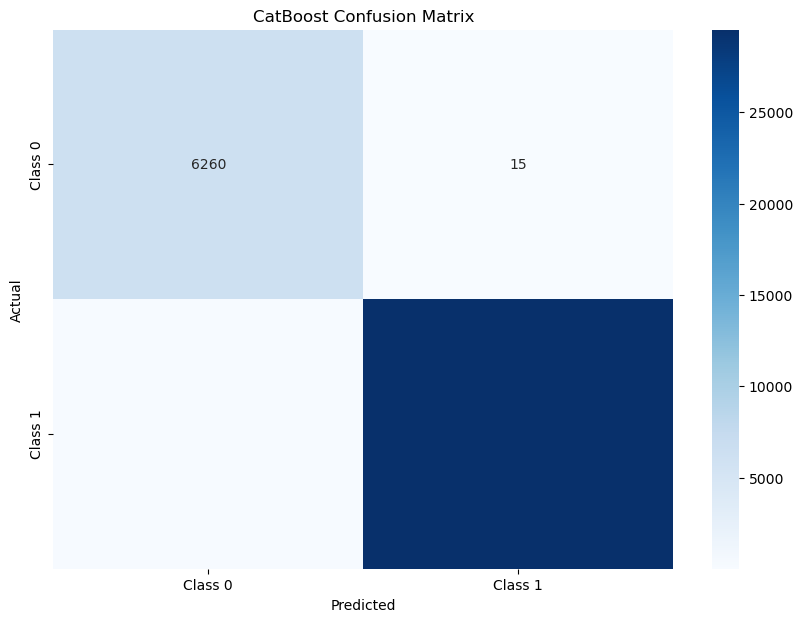

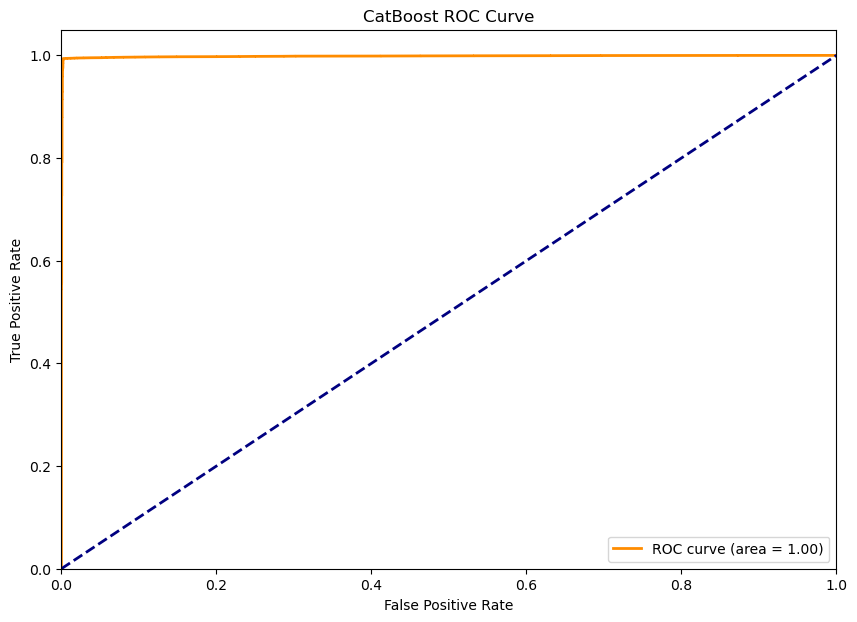

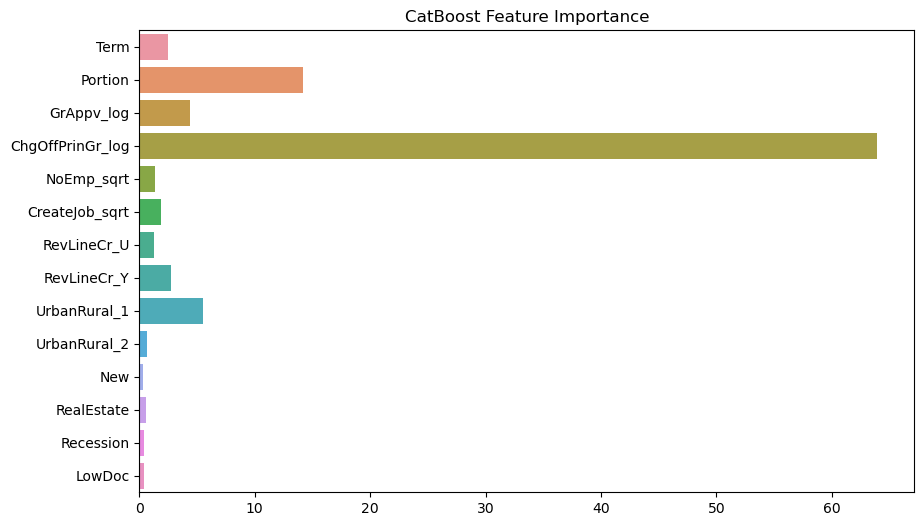

In [73]:
from sklearn.metrics import roc_curve, auc
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CatBoost Confusion Matrix')
plt.savefig("catboost_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CatBoost ROC Curve')
plt.legend(loc="lower right")
plt.savefig("catboost_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

# Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=catboost_classifier.feature_importances_, y=X.columns)
plt.title('CatBoost Feature Importance')
plt.savefig("catboost_feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()

In [74]:
cm

array([[ 6260,    15],
       [  182, 29510]], dtype=int64)

Our goal is to predict default before the charge-off occurs, ChgOffPrinGr_log is revealing future information (i.e., how much was eventually charged off). This could artificially inflate model performance. We need to remove this feature, since it might not be known at the time of loan origination.

In [75]:
features_to_drop = ['ChgOffPrinGr_log']
data_sample = data_sample.drop(columns=features_to_drop)

In [76]:
X = data_sample.drop(columns=['MIS_Status'])  
y = data_sample['MIS_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [78]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N features and their importance values
N = 10
top_features = feature_importance_df.head(N)
print(top_features)

           Feature  Importance
0             Term    0.556317
2       GrAppv_log    0.160049
3       NoEmp_sqrt    0.092290
1          Portion    0.045865
4   CreateJob_sqrt    0.037735
7     UrbanRural_1    0.026164
11       Recession    0.019619
10      RealEstate    0.013866
9              New    0.011634
5      RevLineCr_U    0.011324


In [84]:
top_features

,Feature,Importance
0,Term,0.556317
2,GrAppv_log,0.160049
3,NoEmp_sqrt,0.092290
1,Portion,0.045865
4,CreateJob_sqrt,0.037735
7,UrbanRural_1,0.026164
11,Recession,0.019619
10,RealEstate,0.013866
9,New,0.011634
5,RevLineCr_U,0.011324


In [89]:
X_train.columns

Index(['Term', 'Portion', 'GrAppv_log', 'NoEmp_sqrt', 'CreateJob_sqrt',
       'RevLineCr_U', 'RevLineCr_Y', 'UrbanRural_1', 'UrbanRural_2', 'New',
       'RealEstate', 'Recession', 'LowDoc'],
      dtype='object')

In [90]:
selected_features = ['Term', 'Portion', 'GrAppv_log', 'NoEmp_sqrt', 'CreateJob_sqrt',
                       'RevLineCr_U', 'UrbanRural_1',  'New',
                           'RealEstate', 'Recession']

In [91]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [92]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_selected, y_train)

# Make predictions
y_pred = rf.predict(X_test_selected)
y_proba = rf.predict_proba(X_test_selected)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      6275
           1       0.95      0.96      0.96     29692

    accuracy                           0.93     35967
   macro avg       0.88      0.85      0.87     35967
weighted avg       0.92      0.93      0.92     35967

Accuracy Score: 0.9257652848444408


In [93]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 4648  1627]
 [ 1043 28649]]


4648 = True Negatives (TN): The model correctly predicted Negative on 4648 actual negative cases.<br>
1627 = False Positives (FP): The model incorrectly predicted Positive on 1627 actual negative cases.<br>
1043 = False Negatives (FN): The model incorrectly predicted Negative on 1043 actual positive cases.<br>
28649 = True Positives (TP): The model correctly predicted Positive on 28649 actual positive cases.<br>

Overall, this confusion matrix indicates the model is performing well: it correctly identifies most positives (high recall) and, when it predicts positive, it’s right about 95% of the time (high precision). The main tradeoff is a moderate number of false positives (1,627) and a relatively small number of false negatives (1,043).

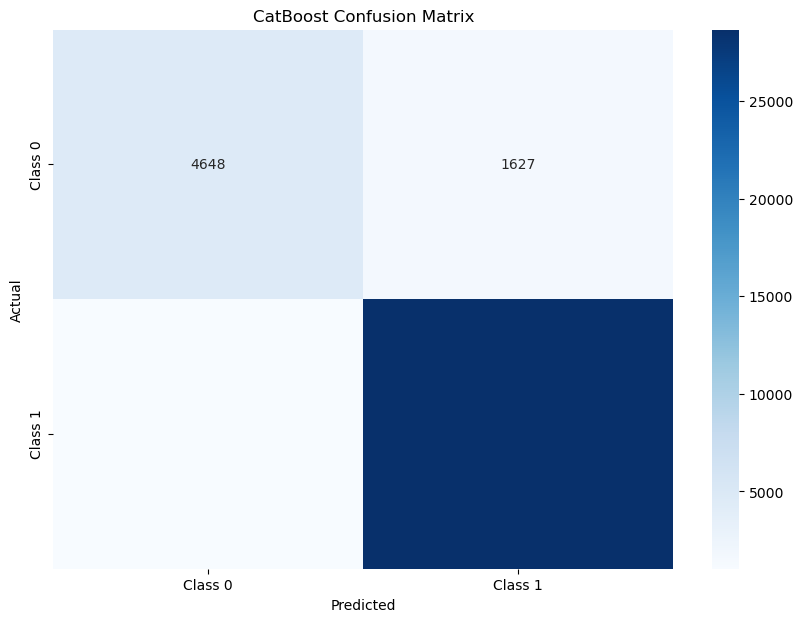

In [94]:
# Confusion Matrix
cm = conf_matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CatBoost Confusion Matrix')
plt.savefig("catboost_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

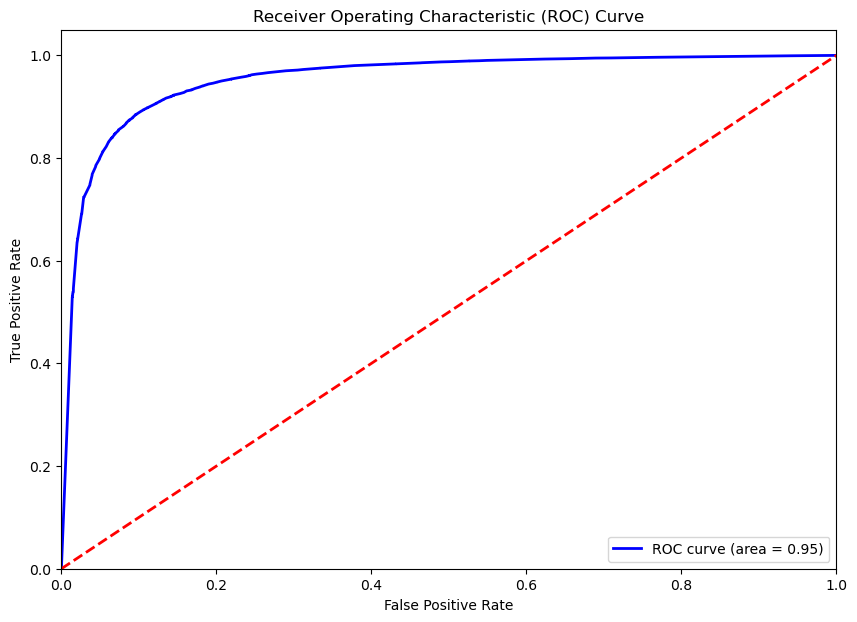

In [95]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Pickle the model

In [96]:
import pickle

model = RandomForestClassifier()
model.fit(X_train_selected, y_train)

filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
filename = 'model.pkl'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

## Function to predict loan approval

In [97]:
def predict_loan_approval(model, input_data):

    # Define the columns based on model's feature names
    columns = [
        'Term', 
        'Portion', 
        'GrAppv_log', 
        'NoEmp_sqrt', 
        'CreateJob_sqrt',
        'RevLineCr_U', 
        'UrbanRural_1', 
        'New',
        'RealEstate', 
        'Recession'
    ]

    # Convert input_data into a single-row DataFrame
    input_df = pd.DataFrame([input_data], columns=columns)

    # Generate prediction (model outputs an array)
    prediction = model.predict(input_df)

    # Interpret the predicted class
    if prediction[0] == 1:
        return "Loan Approved"
    else:
        return "Loan Not Approved"


# Example usage:
# Make sure these keys match the columns list exactly
input_data = {
    'Term': 36,            # e.g., 36-month loan
    'Portion': 0.50,       # Example portion
    'GrAppv_log': 11.4006, # Log of approved amount, e.g. log(90000)
    'NoEmp_sqrt': 4,       # sqrt of # employees
    'CreateJob_sqrt': 3,   # sqrt of jobs created
    'RevLineCr_U': 1,      # "U" category of RevLineCr (1 or 0)
    'UrbanRural_1': 0,     # If the location is '1' or not (one-hot)
    'New': 1,              # e.g., 1 if new business
    'RealEstate': 1,       # e.g., 1 if real estate involved
    'Recession': 0         # e.g., 0 if not in recession
}

# Assuming 'model' is your trained RandomForestClassifier (or similar)
loan_status = predict_loan_approval(model, input_data)
print(loan_status)

Loan Approved


In [99]:
input_data = {'Term': 36,
              'Portion': 0.58,
              'GrAppv_log': 12.0047,
              'NoEmp_sqrt': 21.02,
              'CreateJob_sqrt': 7.81,
              'RevLineCr_U': 1,
              'UrbanRural_1': 1,
              'New': 1,
              'RealEstate': 0,
              'Recession': 0}
loan_status = predict_loan_approval(model, input_data)
print(loan_status)

Loan Approved


In [101]:
input_data = {
    'Term': 12,             # Very short term (e.g., 12 months)
    'Portion': 0.05,        # Very small coverage or guarantee portion
    'GrAppv_log': 8.5172,   # Log(5000) => relatively small loan amount
    'NoEmp_sqrt': 1.0,      # sqrt(1) => a single employee
    'CreateJob_sqrt': 0.0,  # no new jobs created
    'RevLineCr_U': 1,       # "U" category might be less favorable
    'UrbanRural_1': 1,      # possibly a riskier or less advantaged region
    'New': 1,               # brand-new business, lacking track record
    'RealEstate': 0,        # no real estate involvement => less collateral
    'Recession': 1          # applying during a recession
}


loan_status = predict_loan_approval(model, input_data)
print(loan_status)

Loan Not Approved


### Rationale<br>
Short Loan Term: A 12‐month loan can be more burdensome for a small or new business.

Minimal Portion: If this indicates a low guarantee or coverage, it increases lender risk.

Small Approved Amount: exp(8.5172)≈$5,000 might not be enough capital for stable growth, yet still poses credit risk.

Tiny Business Size: Only 1 employee (i.e., NoEmp_sqrt=1.0). Small, new businesses often have higher failure rates.

No Jobs Created: Not contributing to job growth can reduce the appeal or confidence in the venture.

“U” Category, Possibly Less Favorable for RevLineCr.

Rural Setting (UrbanRural_1=1) or otherwise less resourced environment.

No Real Estate Collateral: Harder to recoup losses if default happens.

During Recession: Macroeconomic conditions further raise default odds.